In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf


In [2]:
dfs = [pd.read_csv('./Dataset/user_' + user + '.csv') for user in [ 'b', 'c', 'd']]

In [3]:
for i in range(len(dfs)):
    dfs[i]['User'] = pd.Series(i, index=dfs[i].index)

In [4]:
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)
data[['Class']] = data[['Class']].replace('2.0','-1')
data

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
0,0.0,3575.001413,2067.069485,1.100858,2.434076,0.543417,2.021302,2.553511,2.365487,3568.869690,...,2.039709,3573.533259,2064.975048,0.761069,2.073592,0.261481,1.063716,2.166494,1.885875,0
1,0.0,3573.472842,2065.800686,1.090318,3.227924,0.648712,2.059264,2.774706,3.411464,3575.626827,...,9.331080,3580.290004,2079.580199,0.407036,4.721191,1.604364,2.884035,1.414675,2.954279,1
2,2.0,3574.983768,2065.875038,1.907066,3.382158,1.549094,2.302073,2.396191,3.876850,3576.225454,...,6.201022,3585.648095,2078.434125,2.326482,3.208700,0.725349,1.448075,0.950014,2.020696,1
3,0.0,3572.080889,2062.954256,1.208711,2.185933,0.527516,1.383347,1.491573,2.038180,3563.766670,...,1.798504,3569.509367,2062.287309,1.500673,2.816629,0.505014,1.382074,1.489048,2.270938,2
4,1.0,3573.534709,2065.113750,0.855827,1.172306,0.528934,0.849275,2.082744,2.229527,3568.692097,...,1.663012,3573.903622,2064.162117,0.645148,1.849567,1.120343,1.371170,1.359754,1.902640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2.0,3569.816065,2064.256275,1.159745,2.601396,0.792874,1.398193,0.893148,1.757888,3562.795598,...,2.229643,3567.598599,2061.716118,1.206217,2.178799,0.996849,2.414660,1.133285,1.904587,2
8636,1.0,3571.552090,2062.816733,0.848895,1.656839,0.829219,1.522172,1.348889,2.943499,3564.450695,...,2.214043,3570.155457,2062.594641,2.122560,3.098691,0.796147,2.367273,1.458096,2.404202,2
8637,0.0,3571.804672,2064.692984,0.537253,2.528020,0.787340,1.793262,2.764398,3.844259,3572.500322,...,13.131767,3586.494094,2079.889779,1.264305,3.406159,0.766959,4.300380,1.355594,2.885730,1
8638,0.0,3566.836591,2061.201192,0.382628,1.410153,0.620024,1.488091,2.036828,2.512457,3573.635671,...,1.499659,3569.218561,2062.246786,0.756692,1.321790,0.173517,1.044779,1.327151,2.150542,0


In [5]:
x_data=data.iloc[:,1:]
y_data=data.iloc[:,0]
data

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
0,0.0,3575.001413,2067.069485,1.100858,2.434076,0.543417,2.021302,2.553511,2.365487,3568.869690,...,2.039709,3573.533259,2064.975048,0.761069,2.073592,0.261481,1.063716,2.166494,1.885875,0
1,0.0,3573.472842,2065.800686,1.090318,3.227924,0.648712,2.059264,2.774706,3.411464,3575.626827,...,9.331080,3580.290004,2079.580199,0.407036,4.721191,1.604364,2.884035,1.414675,2.954279,1
2,2.0,3574.983768,2065.875038,1.907066,3.382158,1.549094,2.302073,2.396191,3.876850,3576.225454,...,6.201022,3585.648095,2078.434125,2.326482,3.208700,0.725349,1.448075,0.950014,2.020696,1
3,0.0,3572.080889,2062.954256,1.208711,2.185933,0.527516,1.383347,1.491573,2.038180,3563.766670,...,1.798504,3569.509367,2062.287309,1.500673,2.816629,0.505014,1.382074,1.489048,2.270938,2
4,1.0,3573.534709,2065.113750,0.855827,1.172306,0.528934,0.849275,2.082744,2.229527,3568.692097,...,1.663012,3573.903622,2064.162117,0.645148,1.849567,1.120343,1.371170,1.359754,1.902640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2.0,3569.816065,2064.256275,1.159745,2.601396,0.792874,1.398193,0.893148,1.757888,3562.795598,...,2.229643,3567.598599,2061.716118,1.206217,2.178799,0.996849,2.414660,1.133285,1.904587,2
8636,1.0,3571.552090,2062.816733,0.848895,1.656839,0.829219,1.522172,1.348889,2.943499,3564.450695,...,2.214043,3570.155457,2062.594641,2.122560,3.098691,0.796147,2.367273,1.458096,2.404202,2
8637,0.0,3571.804672,2064.692984,0.537253,2.528020,0.787340,1.793262,2.764398,3.844259,3572.500322,...,13.131767,3586.494094,2079.889779,1.264305,3.406159,0.766959,4.300380,1.355594,2.885730,1
8638,0.0,3566.836591,2061.201192,0.382628,1.410153,0.620024,1.488091,2.036828,2.512457,3573.635671,...,1.499659,3569.218561,2062.246786,0.756692,1.321790,0.173517,1.044779,1.327151,2.150542,0


In [6]:
data_1=data.copy()
data=data[data.columns.drop(list(data.filter(regex='alpha')))]
data=data[data.columns.drop(list(data.filter(regex='theta')))]
data=data[data.columns.drop(list(data.filter(regex='beta')))]

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(data)
scaled_data=scaler.transform(data)
data=pd.DataFrame(scaled_data)
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.224745,0.399313,0.410362,-0.039024,-0.254223,0.157984,-0.218503,-0.154123,-0.536420,0.063077,...,-0.328584,0.070449,-0.172502,0.007468,-0.434438,0.005134,-0.408444,0.231897,-0.156878,-1.224745
1,-1.224745,0.238514,0.192741,1.332844,1.235118,0.712153,1.130066,0.743681,1.297325,0.909139,...,0.958208,0.432179,0.637802,0.626413,1.117078,0.778073,1.286000,0.588690,0.921384,0.000000
2,1.224745,0.397457,0.205494,1.454380,1.321674,0.735086,0.494858,0.273144,0.264441,0.641750,...,1.027798,0.151113,0.029809,0.915474,0.524819,0.954528,0.651979,0.871627,0.836772,0.000000
3,-1.224745,0.092087,-0.295470,-1.075064,-1.129583,0.040115,-0.371249,-0.048214,-0.424847,0.003515,...,-0.355128,-0.002487,-0.226575,0.192890,-0.259376,0.115536,-0.320807,0.019413,-0.355308,1.224745
4,0.000000,0.245022,0.074920,-0.075080,-0.424816,0.132503,-0.315622,-0.325706,-0.625158,0.059385,...,-0.358576,0.043696,-0.195258,-0.038117,-0.474352,0.027798,-0.394761,0.251454,-0.216895,-1.224745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,1.224745,-0.146162,-0.072152,-1.272216,-1.166531,0.050411,-0.378314,-0.114447,-0.463125,0.005505,...,-0.225770,-0.021653,-0.237168,0.117108,-0.195131,-0.131214,-0.503403,-0.081486,-0.397477,1.224745
8636,0.000000,0.036460,-0.319058,-0.936190,-1.081659,0.044568,-0.389201,0.078113,0.056038,0.005909,...,-0.179716,0.042872,-0.184594,-0.180513,-0.332819,0.123394,-0.308163,0.053530,-0.332618,1.224745
8637,-1.224745,0.063030,0.002751,0.698085,0.657591,-0.437791,1.183158,1.105787,2.388178,0.502953,...,1.814110,4.699769,4.924690,1.256470,2.971758,0.641796,2.197775,0.916301,0.944240,0.000000
8638,-1.224745,-0.459589,-0.596151,0.928589,0.594328,0.087974,-0.312487,0.373769,-0.026422,0.272023,...,-0.386481,0.052135,-0.187772,0.056894,-0.337653,-0.083830,-0.479972,0.004057,-0.358299,-1.224745


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=123)


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import matplotlib.pyplot as plt

In [11]:
model_lda = LinearDiscriminantAnalysis()
q=model_lda.fit(x_data.astype('int'),y_data.astype('int'))

In [12]:
lda_transform_data=q.transform(x_data)

In [13]:
x_data.shape

(8640, 113)

In [14]:
lda_transform_data.shape

(8640, 2)

In [15]:
lda_transform_data

array([[-0.90601906,  0.18443235],
       [-2.28976699, -0.5408865 ],
       [-0.4644371 , -0.57794278],
       ...,
       [ 1.73439927,  1.24129417],
       [-1.32903342, -0.76086017],
       [-0.6078601 , -0.25176043]])

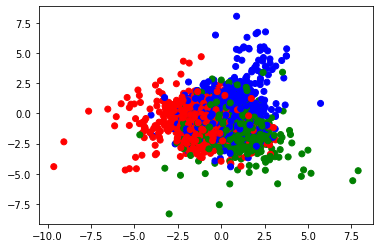

In [16]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(lda_transform_data[:,0],lda_transform_data[:,1],c=colormap[y_data.astype(int)])
plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(lda_transform_data, y_data, train_size=0.8, random_state=123)

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu')
])


model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])


history=model.fit(x_train, y_train, epochs=100)

Epoch 1/100
216/216 [==============================] - 1s 2ms/step - loss: 0.7884 - accuracy: 0.0683
Epoch 2/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7485 - accuracy: 0.0773
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.0906
Epoch 4/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.0655
Epoch 5/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7407 - accuracy: 0.0839
Epoch 6/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7417 - accuracy: 0.0995
Epoch 7/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.0666
Epoch 8/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7401 - accuracy: 0.0716
Epoch 9/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.0543
Epoch 10/100
216/216 [==============================] - 0s 2ms/step - loss: 0.7370 - accura

216/216 [==============================] - 1s 4ms/step - loss: 0.7131 - accuracy: 0.0655
Epoch 82/100
216/216 [==============================] - 1s 4ms/step - loss: 0.7133 - accuracy: 0.0804
Epoch 83/100
216/216 [==============================] - 1s 3ms/step - loss: 0.7130 - accuracy: 0.0991
Epoch 84/100
216/216 [==============================] - 1s 3ms/step - loss: 0.7154 - accuracy: 0.1052
Epoch 85/100
216/216 [==============================] - 1s 3ms/step - loss: 0.7146 - accuracy: 0.0942
Epoch 86/100
216/216 [==============================] - 1s 3ms/step - loss: 0.7145 - accuracy: 0.0625
Epoch 87/100
216/216 [==============================] - 1s 3ms/step - loss: 0.7136 - accuracy: 0.0699
Epoch 88/100
216/216 [==============================] - 1s 4ms/step - loss: 0.7129 - accuracy: 0.0706
Epoch 89/100
216/216 [==============================] - 1s 4ms/step - loss: 0.7152 - accuracy: 0.0602
Epoch 90/100
216/216 [==============================] - 1s 3ms/step - loss: 0.7156 - accuracy: 

In [19]:
model.evaluate(x_test,y_test)

54/54 [==============================] - 0s 1ms/step - loss: 0.7056 - accuracy: 0.1186


[0.7055668234825134, 0.11863426119089127]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
x_r=knn.fit(x_train.astype('int'), y_train.astype('int'))

In [21]:
x_train.shape

(6912, 2)

In [22]:
y_train.shape

(6912,)

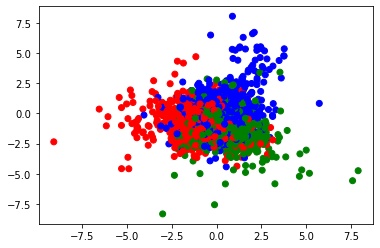

In [23]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_train[:,0],x_train[:,1],c=colormap[y_train.astype(int)])
plt.show()

In [24]:
a=knn.predict(x_test)
print(a)

[0 0 2 ... 0 1 1]


In [25]:
 from sklearn import metrics

print(metrics.accuracy_score(y_test.astype('int'), a))


0.45023148148148145
